<a href="https://colab.research.google.com/github/msht/My_Portfolio/blob/main/Wall_Leidenfrost_Feed_Forward_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/nasim_ML.csv', sep = ',')

In [ ]:
raw_dataset.drop(['time (ns)','Explosive'],axis=1,inplace=True)

In [ ]:
raw_dataset.columns = ['\u03B2', '\u03B4','$\mathregular{N_e}$','$\mathregular{T_w}$*','$\mathregular{T_{Ar}}$*']

In [ ]:
raw_dataset.columns

Index(['β', 'δ', '$\mathregular{N_e}$', '$\mathregular{T_w}$*',
       '$\mathregular{T_{Ar}}$*'],
      dtype='object')

**Data Wrangling**

In [ ]:
raw_dataset.isnull().sum()

β                          0
δ                          0
$\mathregular{N_e}$        0
$\mathregular{T_w}$*       9
$\mathregular{T_{Ar}}$*    9
dtype: int64

In [ ]:
raw_dataset.dropna(inplace=True)

In [ ]:
raw_dataset.isnull().sum()

β                          0
δ                          0
$\mathregular{N_e}$        0
$\mathregular{T_w}$*       0
$\mathregular{T_{Ar}}$*    0
dtype: int64

**Correlation**

In [ ]:
image = plt.figure(figsize=(16,10), dpi = 600)
sns.heatmap(raw_dataset.corr(), annot = True)
plt.show()
image.savefig('Correlation.png',  bbox_inches="tight")

NameError: ignored

**Split Data into X & Y**

In [ ]:
raw_dataset.columns = ['HR', 'thickness','wetting','wall','liquid']

In [ ]:
notoutput = "liquid"
output = "wall"

In [ ]:
X = raw_dataset.drop([output, notoutput], axis = 1)
Y = raw_dataset.iloc[:,3:5]

In [ ]:
X

,HR,thickness,wetting
0,320,3,0.5
1,320,4,0.5
2,320,5,0.5
3,320,6,0.5
4,160,3,0.5
5,160,4,0.5
6,160,5,0.5
7,160,6,0.5
9,80,4,0.5
10,80,5,0.5


In [ ]:
Y

,wall,liquid
0,342.0,133.0
1,336.0,125.0
2,334.0,125.0
3,322.0,121.0
4,309.0,142.0
5,288.0,134.0
6,285.0,125.0
7,285.0,125.0
9,261.0,143.0
10,257.0,136.0


**Pre-Processing of Dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
# Applying Transformation
scaler_X = scaler.fit(X)
scaled_X = scaler.transform(X)

In [ ]:
# Applying Transformation
scaler_Y = scaler.fit(Y)
scaled_Y = scaler.transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, scaled_Y, test_size = 0.2, random_state = 1)

**ANN Regression**

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras import regularizers

In [ ]:
def build_model():
  model = Sequential()
  # Input Layer
  # units = num. of neurons, input shape = shape of features
  lambdaa = 1e-5
  model.add(Dense(units = 16, activation='relu',input_shape = [len(X.keys())],activity_regularizer=regularizers.l2(lambdaa)))

  # Hidden Layer - I
  model.add(Dense(units = 32, activation='relu',activity_regularizer=regularizers.l2(lambdaa)))

  # Hidden Layer - II
  model.add(Dense(units = 32, activation='relu',activity_regularizer=regularizers.l2(lambdaa)))

  # Output Layer
  # Activation Function - Linear
  model.add(Dense(units = 2))

  # Optimizers
  # Learning rate = 'alpha'
  optimizers = Adam(learning_rate= 0.001)

  model.compile(loss = 'mean_squared_error', optimizer = optimizers)
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                64        
_________________________________________________________________
dense_49 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 66        
Total params: 1,730
Trainable params: 1,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Epochs = Number of Iterations, Batch Size = number of samples per execution
# validation_split = 15% of overall training samples to validate algorithm parallely to avoid overfitting of algorithm
#callback = EarlyStopping(monitor='val_loss', patience=1000)
history = model.fit(X_train, Y_train, epochs = 600, validation_split = 0.2)

Epoch 1/600
1/1 [==============================] - 1s 1s/step - loss: 0.2232 - val_loss: 0.2391
Epoch 2/600
1/1 [==============================] - 0s 25ms/step - loss: 0.2148 - val_loss: 0.2305
Epoch 3/600
1/1 [==============================] - 0s 26ms/step - loss: 0.2062 - val_loss: 0.2218
Epoch 4/600
1/1 [==============================] - 0s 32ms/step - loss: 0.1974 - val_loss: 0.2128
Epoch 5/600
1/1 [==============================] - 0s 29ms/step - loss: 0.1887 - val_loss: 0.2036
Epoch 6/600
1/1 [==============================] - 0s 24ms/step - loss: 0.1800 - val_loss: 0.1944
Epoch 7/600
1/1 [==============================] - 0s 27ms/step - loss: 0.1718 - val_loss: 0.1853
Epoch 8/600
1/1 [==============================] - 0s 26ms/step - loss: 0.1639 - val_loss: 0.1764
Epoch 9/600
1/1 [==============================] - 0s 44ms/step - loss: 0.1563 - val_loss: 0.1677
Epoch 10/600
1/1 [==============================] - 0s 29ms/step - loss: 0.1488 - val_loss: 0.1591
Epoch 11/600
1/1 [===

(0.0, 0.2510532379543292)

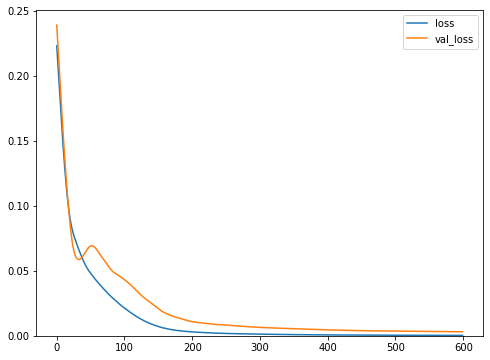

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize = (8,6))
# plt.ylim(top=100)
plt.ylim(bottom=0)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.9466458863240493

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,predictions)

0.005390492811754347

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,predictions)

0.05780501143691924

In [ ]:
# model.weights
predicted_data = model.predict(scaled_X)
r2_score(scaled_Y, predicted_data)

0.9717219681409055

In [ ]:
mean_absolute_error(scaled_Y,predicted_data)

0.024254807403834663

In [ ]:
model.save('/content/drive/MyDrive/Rice Google Drive/Research/Misc/wall_ML_neural/model.h5')

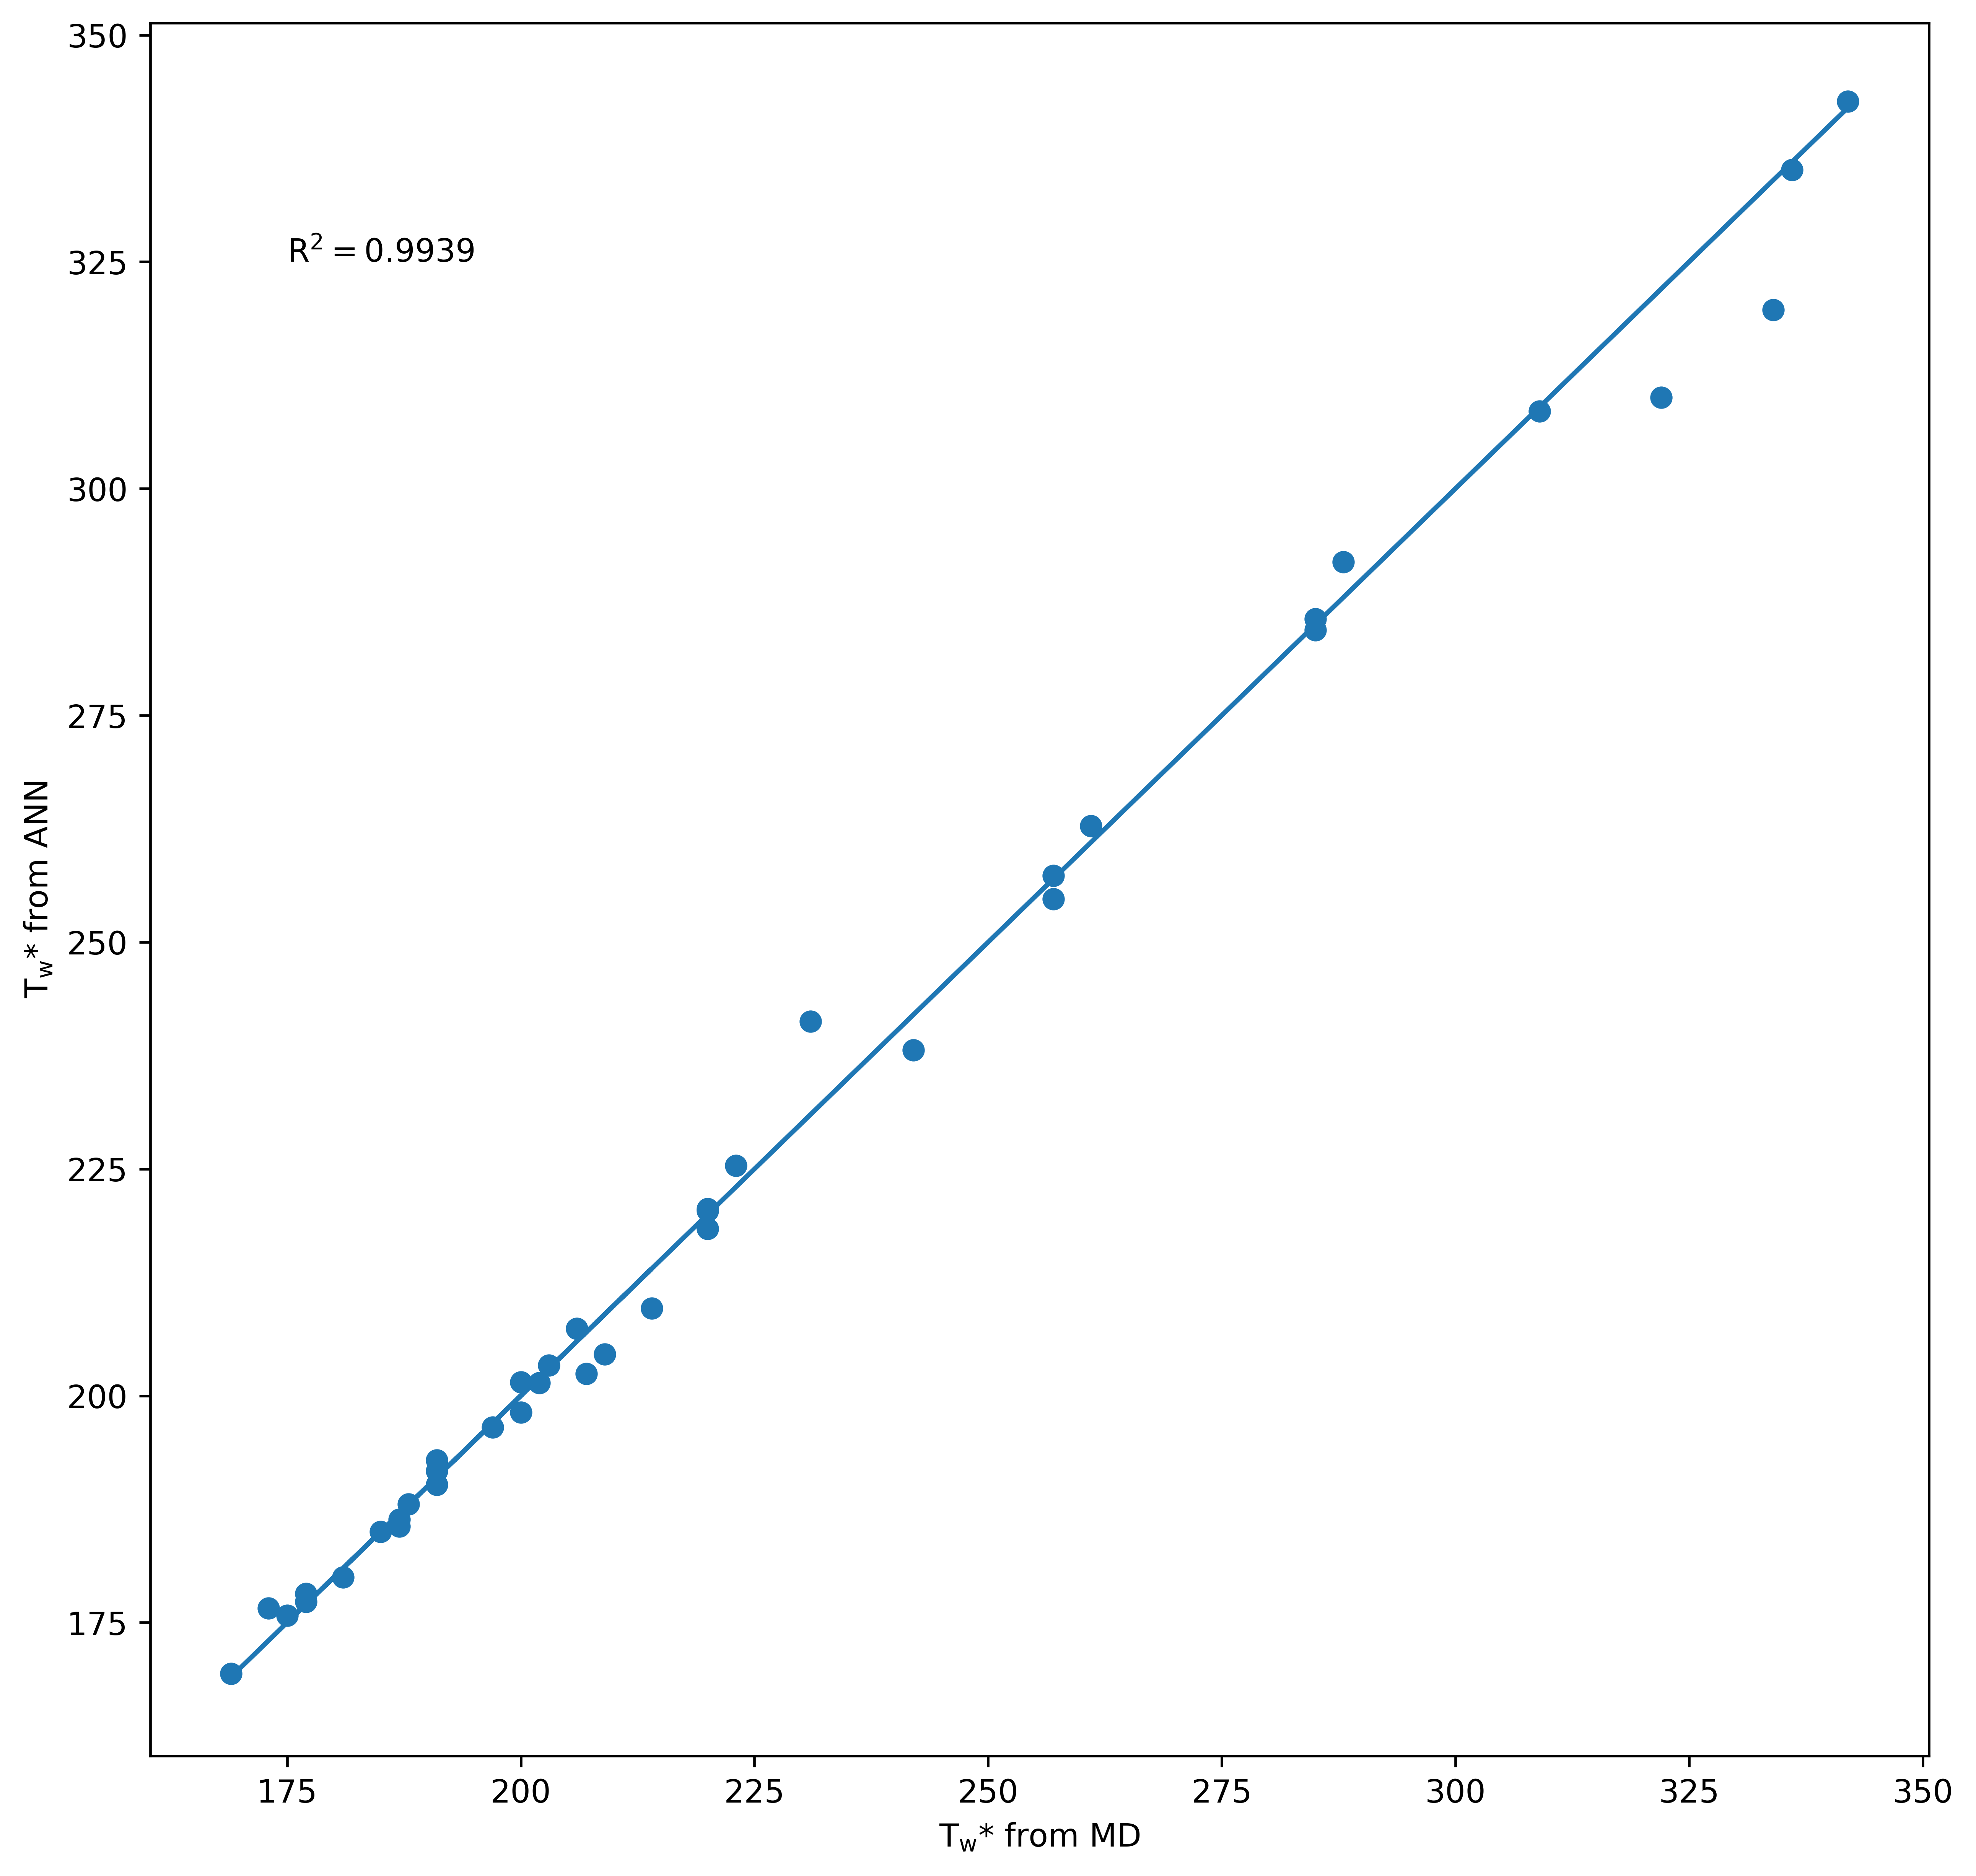

In [ ]:
image2 = plt.figure(figsize=(10,10), dpi = 600)
plt.scatter(Y.iloc[:,0], predicted_Y[:,0])
gg = r2_score(Y.iloc[:,0], predicted_Y[:,0])
plt.text(175, 325, '$\mathregular{R^2 =}$'+str(round(gg,4)))
plt.plot(Y.iloc[:,0],Y.iloc[:,0])
plt.xlabel('$\mathregular{T_w}$* from MD')
plt.ylabel('$\mathregular{T_w}$* from ANN')
plt.show()
image2.savefig('T_w.png',  bbox_inches="tight")

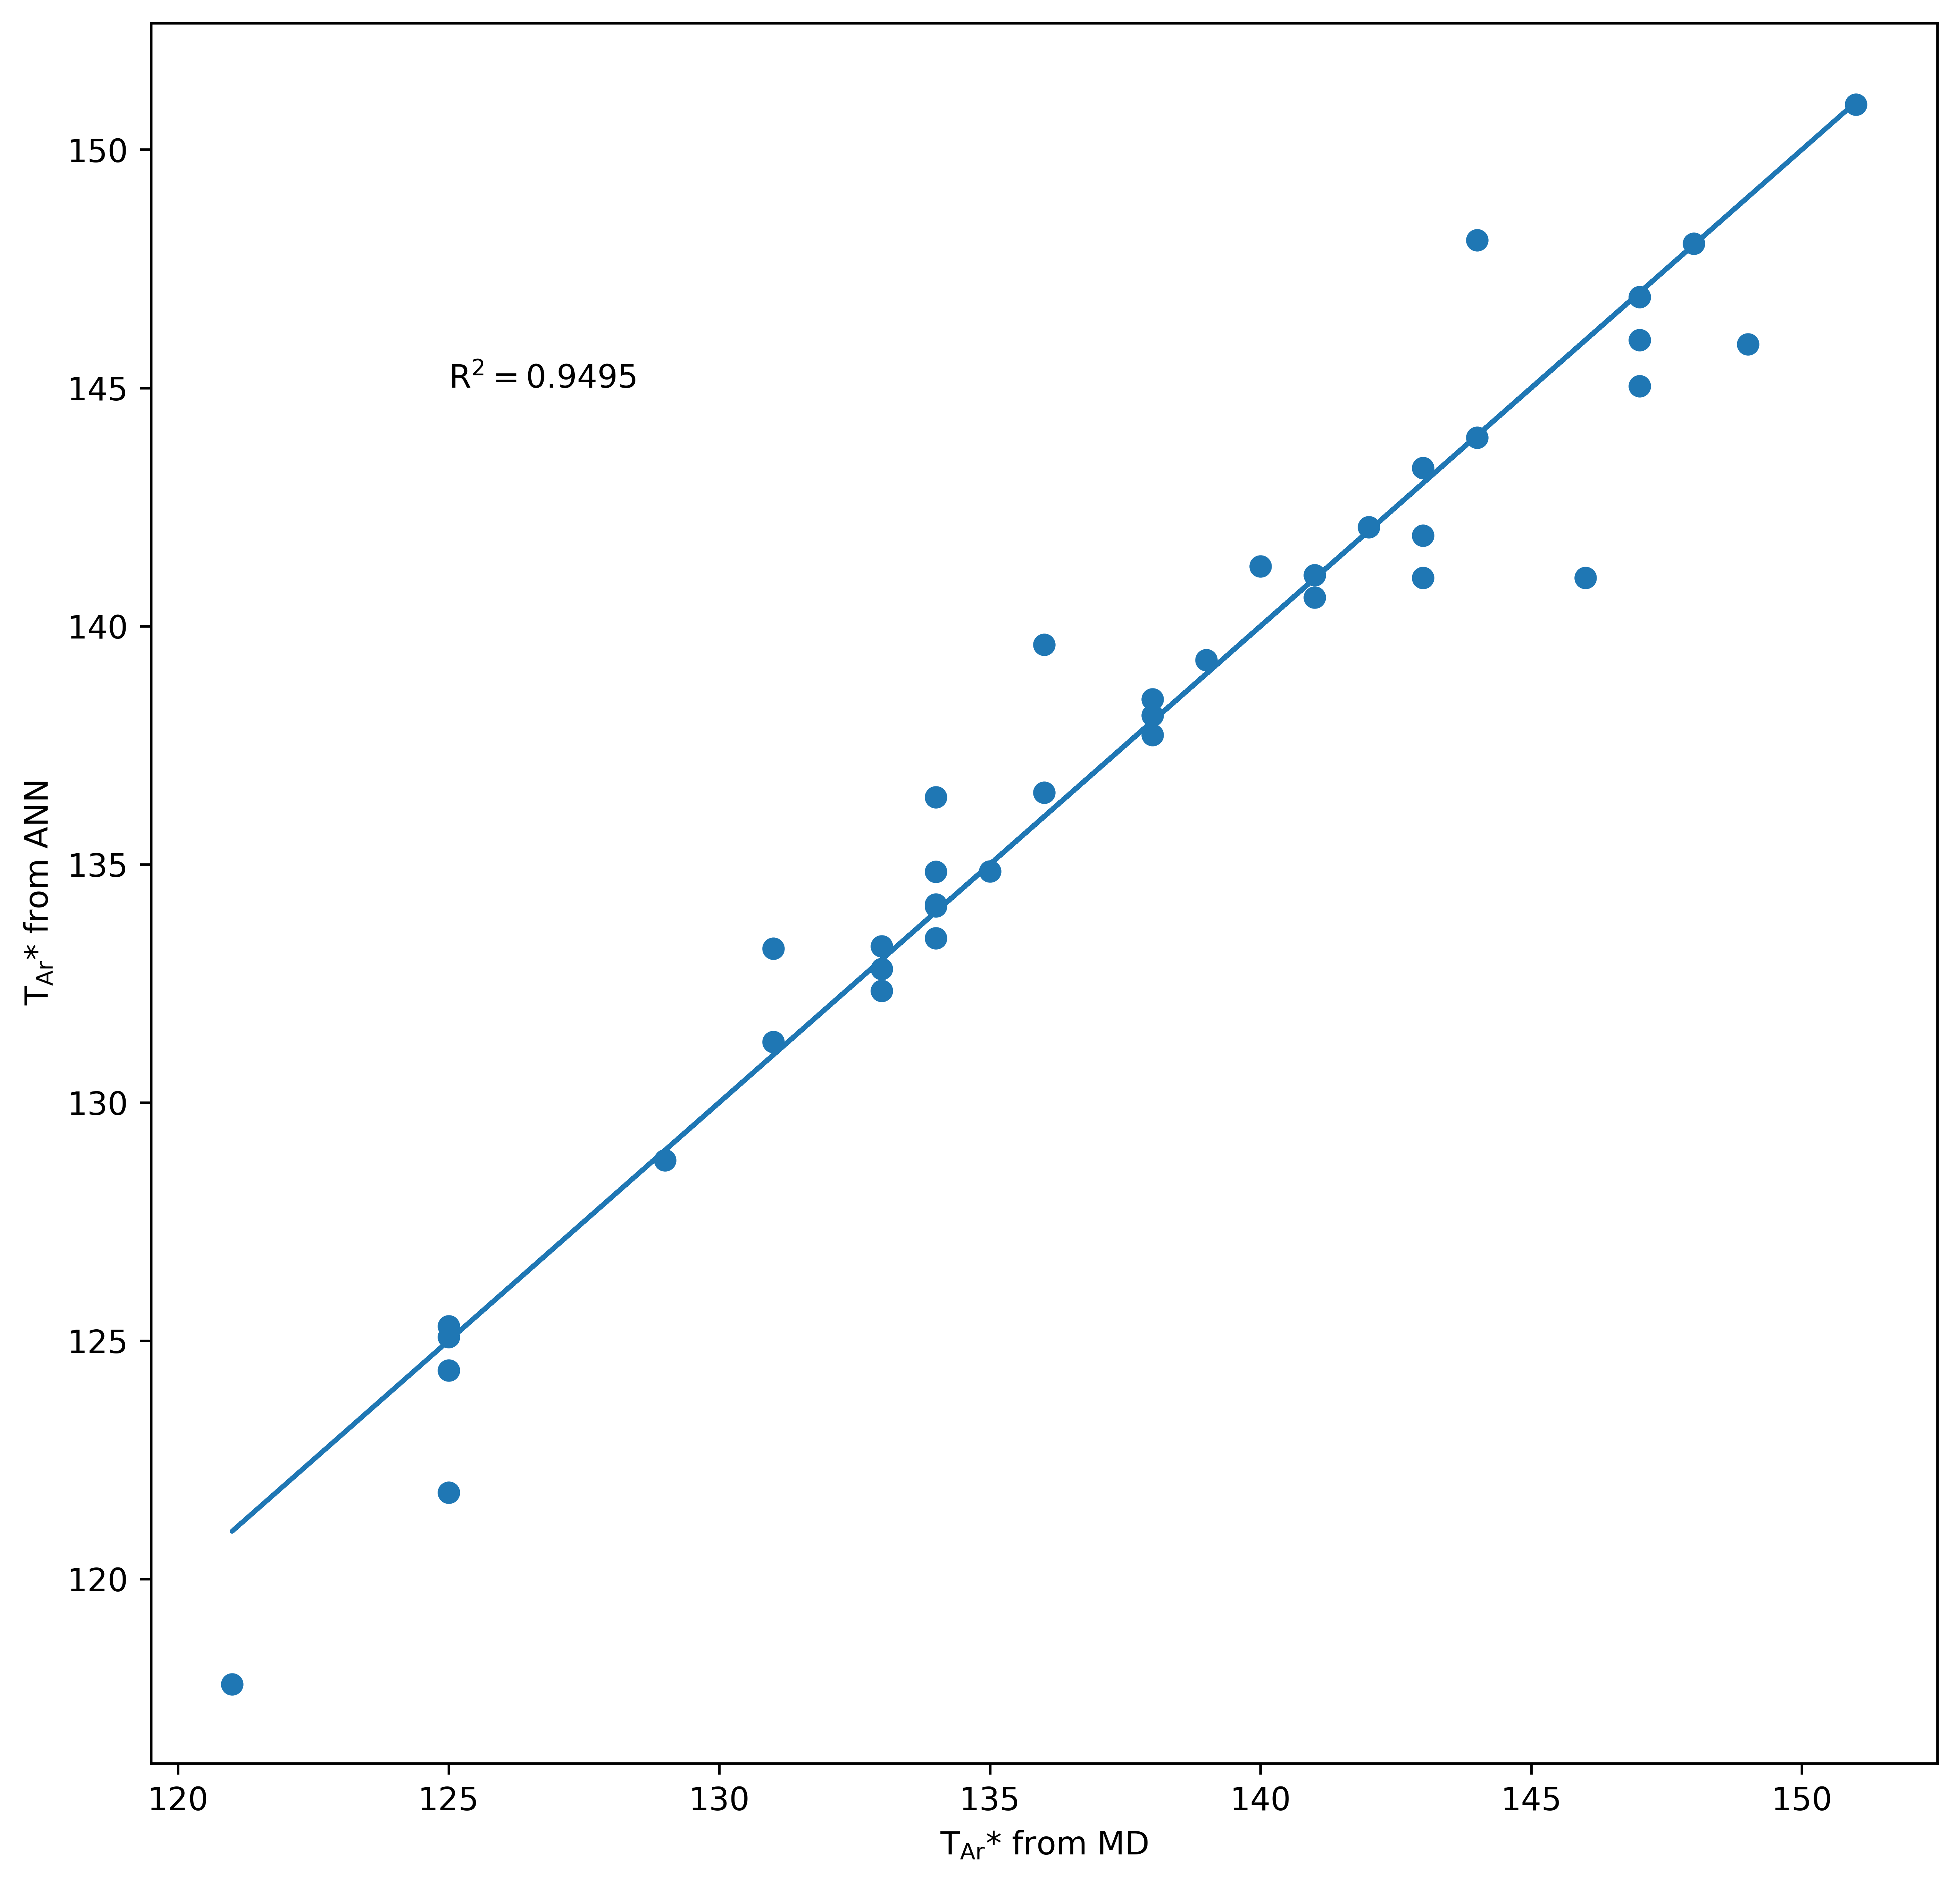

In [ ]:
image3 = plt.figure(figsize=(10,10), dpi = 600)
plt.scatter(Y.iloc[:,1], predicted_Y[:,1])
plt.plot(Y.iloc[:,1],Y.iloc[:,1])
gg = r2_score(Y.iloc[:,1], predicted_Y[:,1])
plt.text(125, 145, '$\mathregular{R^2 =}$'+str(round(gg,4)))
plt.xlabel('$\mathregular{T_{Ar}}$* from MD')
plt.ylabel('$\mathregular{T_{Ar}}$* from ANN')
plt.show()
image3.savefig('T_l.png',  bbox_inches="tight")

In [ ]:
classification_results=pd.read_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/classification_results.csv', sep = ',')

In [ ]:
classification_results = classification_results.iloc[:,1:5]

In [ ]:
classification_results.iloc[:,2]=0.5

In [ ]:
classification_results.iloc[:,0:3]

,0,1,2
0,40.000000,3.0,0.5
1,42.828283,3.0,0.5
2,45.656566,3.0,0.5
3,48.484848,3.0,0.5
4,51.313131,3.0,0.5
...,...,...,...
9995,308.686869,6.0,0.5
9996,311.515152,6.0,0.5
9997,314.343434,6.0,0.5
9998,317.171717,6.0,0.5


In [ ]:
scaler_X_grid = scaler.fit(classification_results.iloc[:,0:3])
scaled_X_grid = scaler_X_grid.transform(classification_results.iloc[:,0:3])

In [ ]:
scaled_Z = model.predict(scaled_X_grid)

In [ ]:
scaler_Y = scaler.fit(Y)

In [ ]:
Z = scaler_Y.transform(scaled_Z)

In [ ]:
X_grid, Y_grid = np.meshgrid(np.linspace(40, 320, 100), np.linspace(3, 6, 100))

In [ ]:
Z_wall = Z[:,0].reshape(X_grid.shape)

NameError: ignored

NameError: ignored

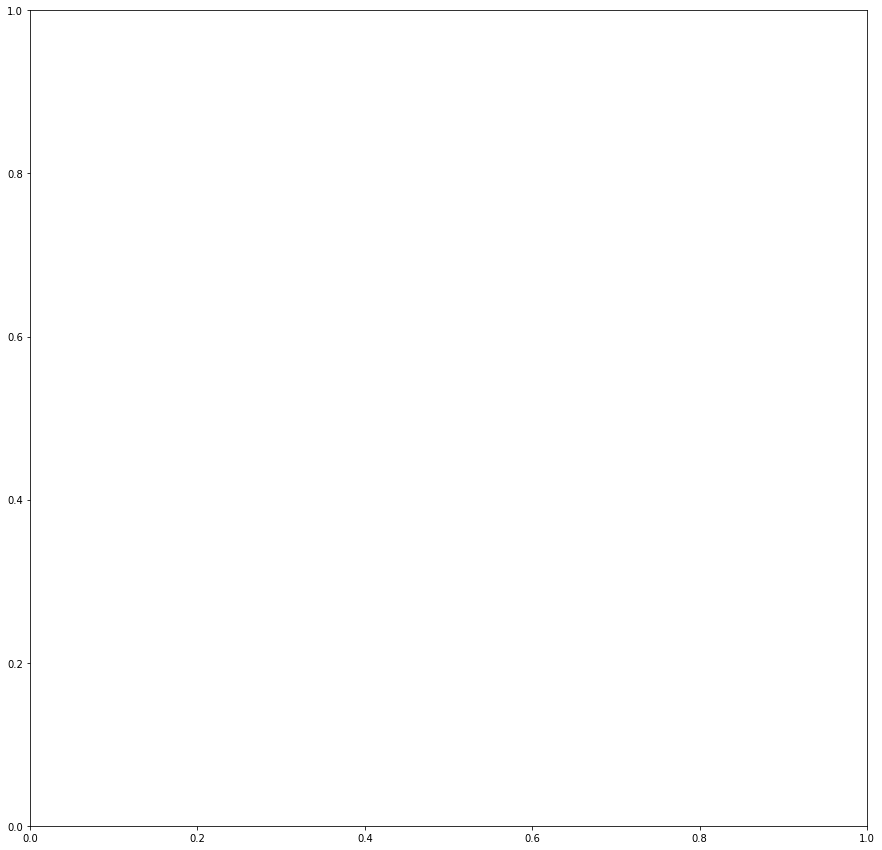

In [ ]:
image4, axs = plt.subplots(1,1,figsize=(15,15))
# fig,ax=plt.subplots(1,1)
cp = ax.contourf(X_grid, Y_grid, Z_wall)
image4.colorbar(cp)
ax.set_xlabel(r'$\beta \times 10^9 Ks^{-1}$')
ax.set_ylabel(r'$\delta$ (nm)')
plt.savefig('jp.jpg')
plt.show()